# EECS 531: Computer Vision Assignment 1
**David Fan, dmf98**

# Exercise 1: Blurring Filter
Blurring filters are used to average out rapid changes in intensity. The image is blurred by comparing each pixel to its neighbors. This process is done by applying a convolution kernel to each pixel of the image. Some examples for possible convolution kernels include the box kernel, the bilinear kernel, and the "Gaussian" kernel.

Box Kernel Example:
<img src="figures/box.png" width="200">

Bilinear Kernel Example:
<img src="figures/bilinear.png" width="200">

Gaussian Kernel Example:
<img src="figures/gaussian.png" width="200">

To achieve the blurring effect we desire, we will convolve each pixel in the image using one of the kernels. This is an expensive operation because for each pixel we would have to perform a multiplication for each of its neighbors resulting in $N^2$ multiplications per pixel. To speed up this operation, we can use a linearly separable kernel allowing us to split the two dimensional kernel matrix into two one dimensional vectors. We can then do a horizontal and vertical convolution resulting in $2N$ multiplications per pixel. For example, the 2D Box Kernel matrix can be split into $v$ and $h$ vectors:
<img src="figures/box1d.png" width="200">

Also of note, for pixels at the edges of the image a strategy needs to be developed for how to handle the lack of full neighbors. For my examples I will set the value of the "missing" neighbor pixels to that of the original pixel.

## Blurring Filters

In [136]:
"""
This is done to ignore deprecation warnings thrown by the image processing library I'm using.
"""
import warnings
warnings.filterwarnings("ignore") 

In [137]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

def blur(kernel):
    image = io.imread('images/einstein.png', as_grey=True)
    blurred = np.copy(image)
    rows, cols = image.shape
    for row in range(rows):
        for col in range(cols):
            response = 0
            kernel_rows, kernel_cols = kernel.shape
            for i in range(kernel_rows):
                row_shift = i - int((kernel_rows - 1)/2)
                for j in range(kernel_cols):
                    col_shift = j - int((kernel_cols - 1)/2)
                    if row - row_shift < 0 or row - row_shift >= rows or col - col_shift < 0 or col - col_shift >= cols:
                        response += image[row][col] * kernel[i][j]
                    else:
                        response += image[row - row_shift][col - col_shift] * kernel[i][j]
            blurred[row][col] = response

    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax1 = plt.subplot(121)
    ax1.set_title('Original Image')
    ax1.imshow(image, cmap='gray') # Note: Why is it green? It was imported as greyscale, and if using imshow with the library it's fine.
    ax2 = plt.subplot(122)
    ax2.set_title('Blurred Image')
    ax2.imshow(blurred, cmap='gray')

In [358]:
def blur_fast(kernel):
    image = io.imread('images/einstein.png', as_grey=True)
    blurred = np.copy(image)
    rows, cols = image.shape
    for row in range(rows):
        for col in range(cols):
            response = 0
            kernel_rows, = kernel.shape
            for i in range(kernel_rows):
                row_shift = i - int((kernel_rows - 1)/2)
                blurred[row][col] = response
                if row - row_shift < 0 or row - row_shift >= rows:
                    response += image[row][col] * kernel[i]
                else:
                    response += image[row - row_shift][col] * kernel[i]  
            blurred[row][col] = response
    temp = np.copy(blurred)
    for row in range(rows):
        for col in range(cols):
            response = 0
            kernel_rows, = kernel.shape
            for i in range(kernel_rows):
                col_shift = i - int((kernel_rows - 1)/2)
                if col - col_shift < 0 or col - col_shift >= cols:
                    response += temp[row][col] * kernel[i]
                else:
                    response += temp[row][col - col_shift] * kernel[i]
            blurred[row][col] = response
 
    print(image - blurred)
    fig = plt.figure()
#     fig.set_figheight(15)
#     fig.set_figwidth(15)
    ax1 = plt.subplot(121)
    ax1.set_title('Original Image')
    ax1.imshow(image, cmap='gray')
    ax2 = plt.subplot(122)
    ax2.set_title('Blurred Image')
    ax2.imshow(blurred, cmap='gray')

## Box Kernel Example
Here we will use a box kernel with K = 3:

Kernel: 
 [0.33333333 0.33333333 0.33333333]
[[ 4.35729847e-04 -6.10021786e-03 -4.35729847e-04 ... -1.17647059e-02
   2.13507625e-02 -4.79302832e-03]
 [-6.97167756e-03 -3.92156863e-03 -8.71459695e-04 ... -1.30718954e-02
   1.74291939e-02 -1.65577342e-02]
 [ 1.13289760e-02  1.13289760e-02  4.35729847e-04 ... -1.78649237e-02
   3.05010893e-02 -5.66448802e-03]
 ...
 [ 6.53594771e-03  2.77555756e-17 -1.74291939e-03 ...  6.10021786e-03
   6.10021786e-03  1.56862745e-02]
 [ 1.43790850e-02 -1.22004357e-02  1.04575163e-02 ...  5.22875817e-03
   4.35729847e-04  1.39433551e-02]
 [ 2.77555756e-17 -1.52505447e-02 -3.05010893e-03 ... -7.40740741e-03
   8.71459695e-03 -2.09150327e-02]]


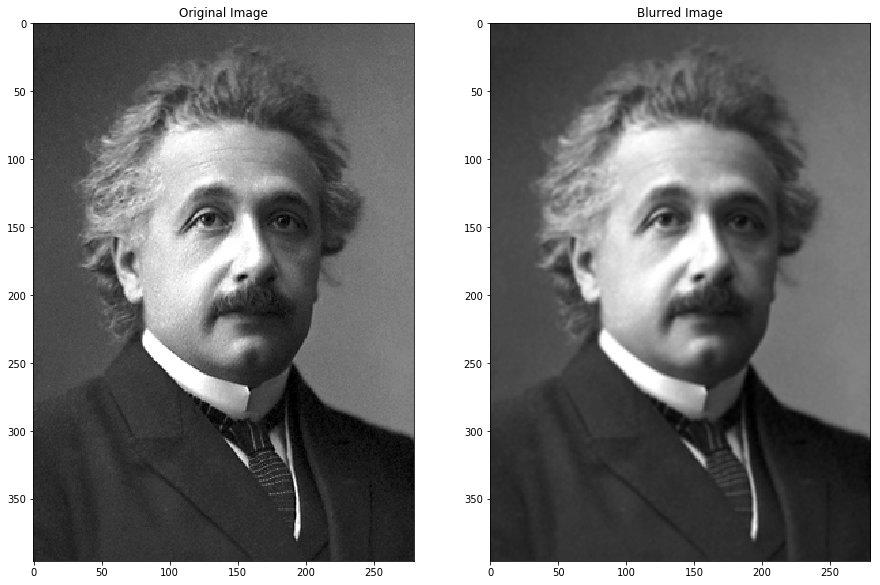

In [139]:
K = 3
box = 1/K * np.ones(K) 
print("Kernel: \n", box)
blur_fast(box)

## Bilinear Kernel Example

[[ 0.0004902  -0.00490196 -0.0004902  ... -0.00882353  0.01593137
  -0.00343137]
 [-0.00539216 -0.00294118 -0.0004902  ... -0.00931373  0.0127451
  -0.0125    ]
 [ 0.00906863  0.00857843 -0.0002451  ... -0.01495098  0.0247549
  -0.00490196]
 ...
 [ 0.00465686  0.00122549 -0.00220588 ...  0.00367647  0.00490196
   0.0120098 ]
 [ 0.01151961 -0.01053922  0.00857843 ...  0.00465686 -0.00122549
   0.01151961]
 [-0.0002451  -0.01102941 -0.00269608 ... -0.00612745  0.00784314
  -0.01666667]]


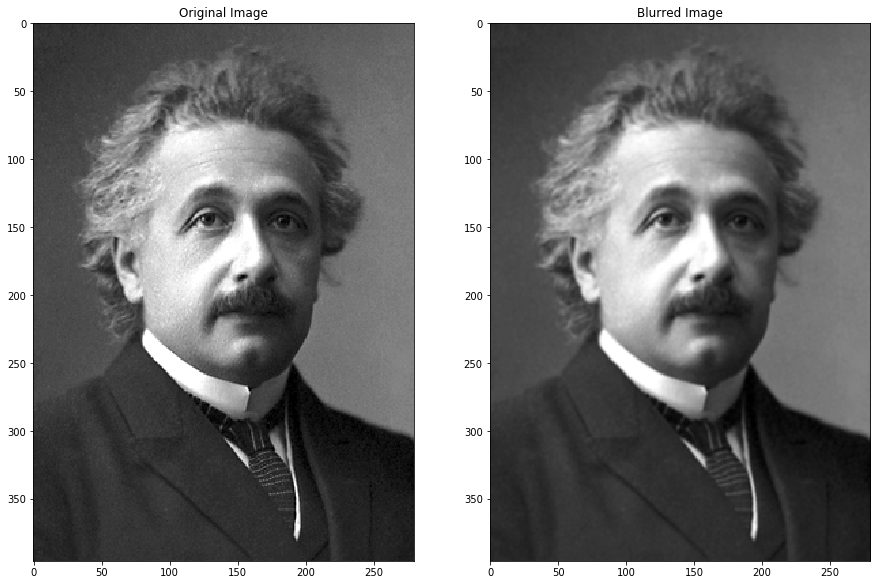

In [140]:
bilinear = 1/4 * np.array([1,2,1])
blur_fast(bilinear)

## Gaussian Kernel Example

[[-0.00128676 -0.00726103  0.00042892 ... -0.01072304  0.01789216
  -0.00281863]
 [-0.00568321 -0.00375306 -0.00010723 ... -0.01055453  0.01478248
  -0.01227022]
 [ 0.00922181  0.01056985  0.00099571 ... -0.01541054  0.02711397
  -0.00416667]
 ...
 [ 0.0057598   0.00171569 -0.00203738 ...  0.00497855  0.00802696
   0.01634498]
 [ 0.01272978 -0.01171875  0.00788909 ...  0.00543811  0.00056679
   0.01360294]
 [-0.00108762 -0.01383272 -0.00370711 ... -0.00585172  0.00749081
  -0.01953125]]


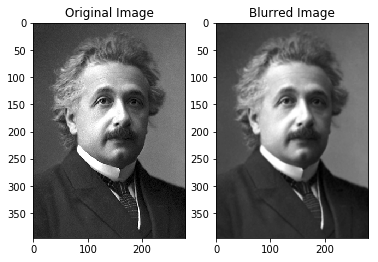

In [359]:
gaussian = 1/16 * np.array([1,4,6,4,1])
blur_fast(gaussian)

As you can see from the above results, the image isn't significantly blurred with either result. I'm not sure if that's because I messed up my code or if that's an expected result. If you look at the difference between the original picture and the blurred picture, the difference in the matrix is very small.

**CORRECTION**: The above statement was made when I ran the filter over a very large image ('images/Grosser_Panda.jpeg'). That image is 4272 × 2848 pixels while the Einstein image is 280 × 396 pixels. The blur is much more apparent with the smaller Einstein image.

# Exercise 2: Edge Detector
There are two basic methods for edge detection:
    1. Gradient based methods
    2. Matched filters

## Gradient Based Methods
Gradient based methods operate by observing rapid changes in intensity. If intensity is defined as a function $I(x)$, then edges will be either maximums or minimums of the first derivative $I'(x)$. When looking at the second derivative $I''(x)$, edges will be zero crossings.

The two classic ways of gradient based edge detection are the Sobel edge detector and the Canny edge detector. The Sobel edge detector first finds the horizontal and vertical intensity gradients by convolving the image with a horizontal Sobel kernel and a vertical Sobel kernel:
<img src="figures/horizontal_sobel.png" width="200"><img src="figures/vertical_sobel.png" width="200">
The actual gradient of the image can then be calculated with
$$G = \sqrt{G_x^2 + G_y^2}$$
where $G$ is the gradient of the image, $G_x$ is the horizontal gradient and $G_y$ is the vertical gradient.

The Canny edge detector works by first applying the Gaussian filter to the image to denoise it. Then, the intensity gradients of the image in the vertical, horizontal, and diagonal directions are found. Then, non-maximum supression is applied to "thin" the edges. Next, double threshold is applied to attempt to find the edges. Finally, the edges that are weak are supressed so that only strong edges or edges connected to strong edges remain.

## Sobel Edge Detector Example

In [142]:
from scipy.signal import convolve2d # Using a library function to do convolutions

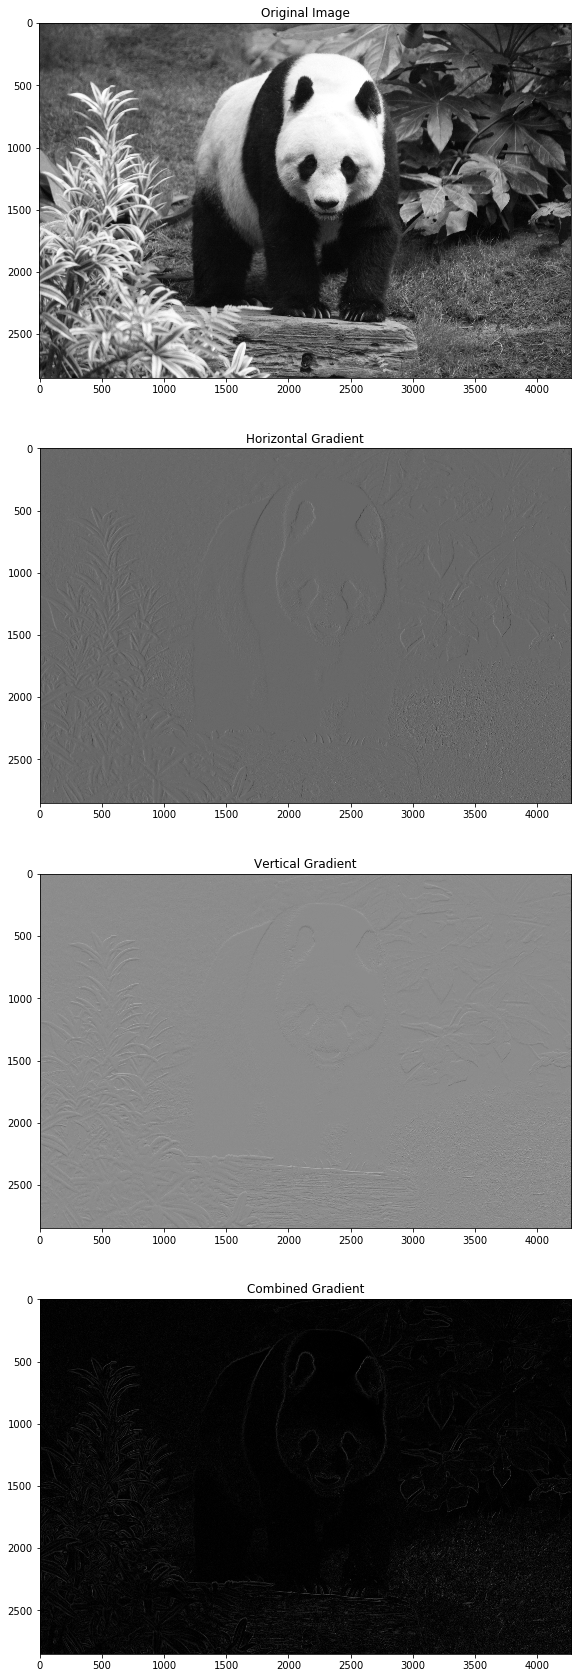

In [163]:
horizontal_sobel_kernel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
vertical_sobel_kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

panda = io.imread('images/Grosser_Panda.jpeg', as_grey=True)
horizontal_gradient = convolve2d(panda, horizontal_sobel_kernel)
vertical_gradient = convolve2d(panda, vertical_sobel_kernel)
gradient = (horizontal_gradient**2 + vertical_gradient**2) ** .5

fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(15)
ax1 = plt.subplot(411)
ax1.set_title('Original Image')
ax1.imshow(panda, cmap='gray')
ax2 = plt.subplot(412)
ax2.set_title('Horizontal Gradient')
ax2.imshow(horizontal_gradient, cmap='gray')
ax3 = plt.subplot(413)
ax3.set_title('Vertical Gradient')
ax3.imshow(vertical_gradient, cmap='gray')
ax4 = plt.subplot(414)
ax4.set_title('Combined Gradient')
ax4.imshow(gradient, cmap='gray')

## Canny Edge Detector Example

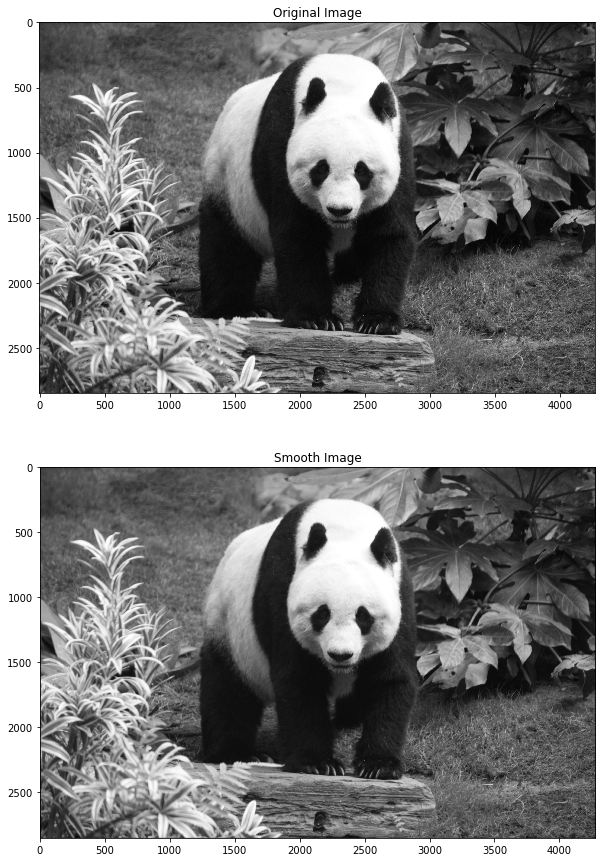

In [184]:
# Step 1: Smoothing
gaussian2d = 1/159 * np.array([[2,4,5,4,2],[4,9,12,9,4],[5,12,15,12,5],[2,4,5,4,2],[4,9,12,9,4]])
smooth = convolve2d(panda, gaussian2d)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax1 = plt.subplot(211)
ax1.set_title('Original Image')
ax1.imshow(panda, cmap='gray')
ax2 = plt.subplot(212)
ax2.set_title('Smooth Image')
ax2.imshow(smooth, cmap='gray')

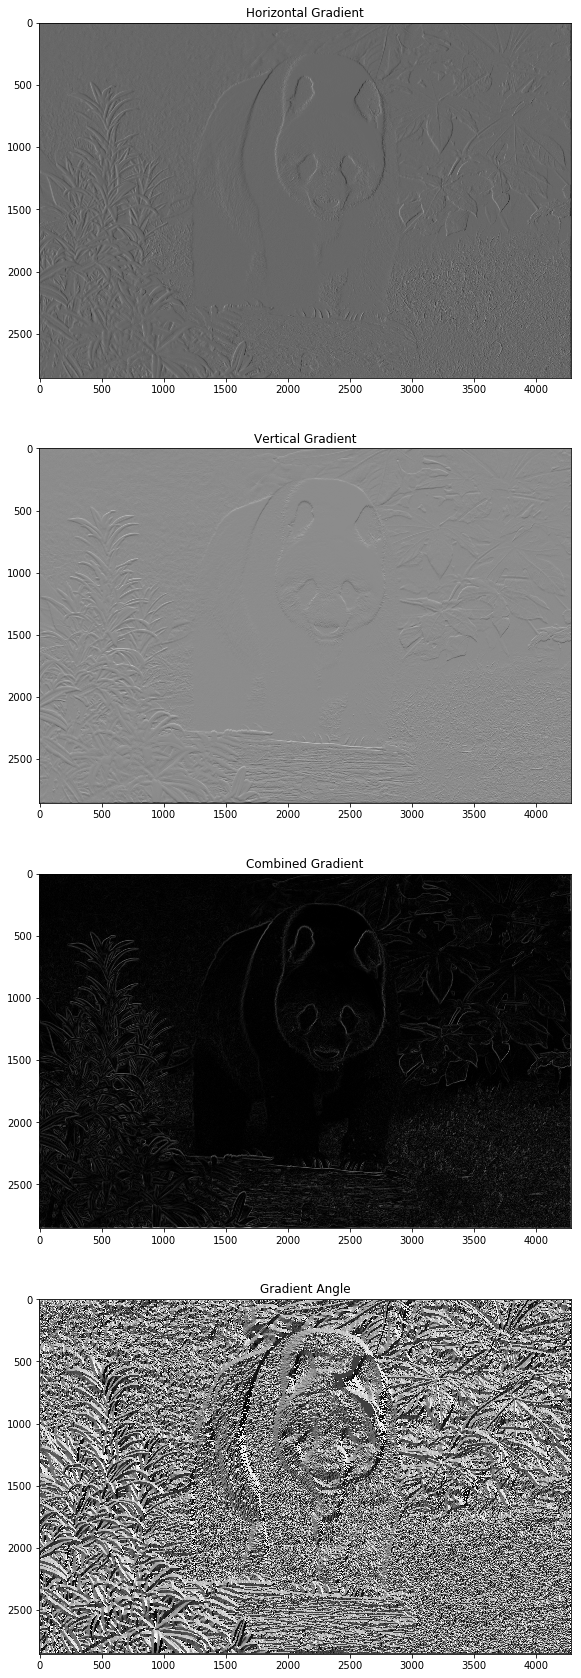

In [173]:
# Step 2: Gradients
horizontal = convolve2d(smooth, horizontal_sobel_kernel)
vertical = convolve2d(smooth, vertical_sobel_kernel)
gradient = np.sqrt(np.add(np.square(horizontal),np.square(vertical)))
angle = np.arctan2(vertical,horizontal)

fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(15)
ax3 = plt.subplot(411)
ax3.set_title('Horizontal Gradient')
ax3.imshow(horizontal, cmap='gray')
ax4 = plt.subplot(412)
ax4.set_title('Vertical Gradient')
ax4.imshow(vertical, cmap='gray')
ax5 = plt.subplot(413)
ax5.set_title('Combined Gradient')
ax5.imshow(gradient, cmap='gray')
ax6 = plt.subplot(414)
ax6.set_title('Gradient Angle')
ax6.imshow(angle, cmap='gray')

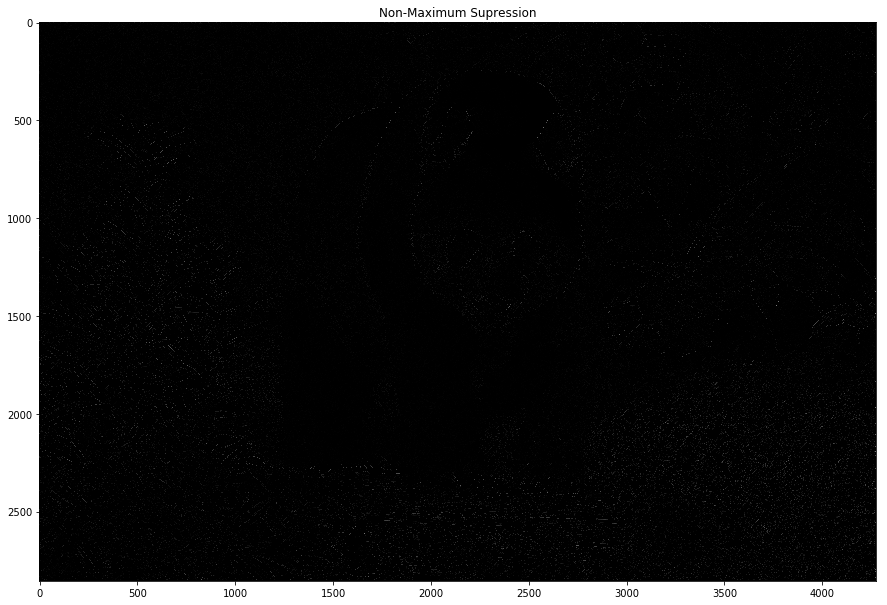

In [188]:
# Step 3: Non-Maximum Supression

def supress(A,B,C):
    if A > B and A > C:
        return A
    else:
        return 0

suppressed = np.zeros_like(gradient)
rows, cols = gradient.shape
for row in range(1, rows - 1):
    for col in range(1, cols - 1):
        theta = angle[row][col]
        response = gradient[row][col]
        if theta >= 2.7488936 or theta < 0.3926991:
            response = supress(response, gradient[row + 1, col], gradient[row - 1, col])
        elif theta >= 0.3926991 and theta < 1.178097:
            response = supress(response, gradient[row + 1, col + 1], gradient[row - 1, col - 1])
        elif theta >= 1.178097 and theta < 1.9634954:
            response = supress(response, gradient[row, col + 1], gradient[row, col - 1])
        elif theta >= 1.9634954 and theta < 2.7488936:
            response = supress(response, gradient[row + 1, col - 1], gradient[row - 1, col + 1])
        suppressed[row][col] = response
        
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax = plt.subplot(111)
ax.set_title('Non-Maximum Supression')
ax.imshow(suppressed, cmap='gray')

KeyboardInterrupt: 

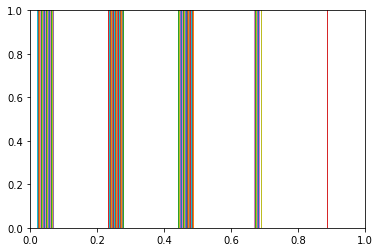

In [367]:
plt.hist(suppressed)

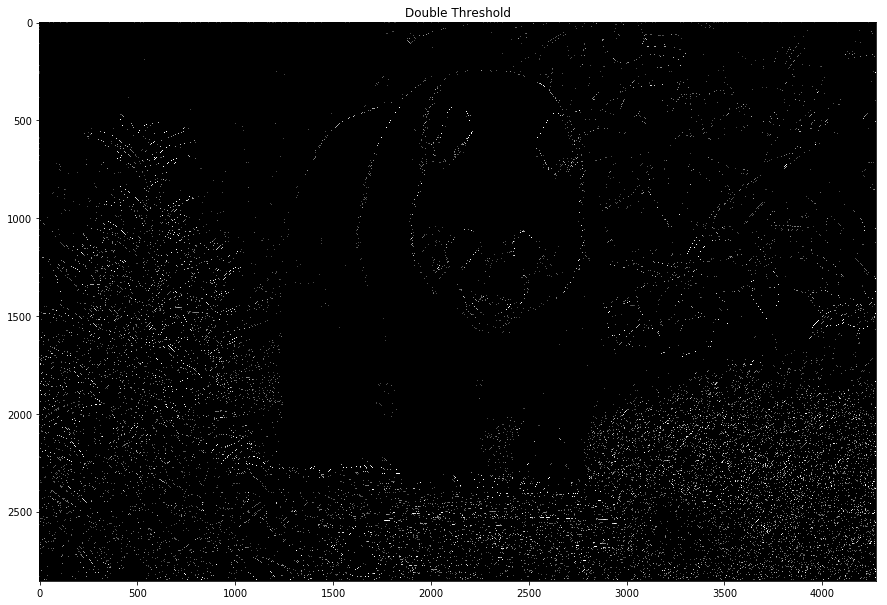

In [366]:
# Step 4: Double Threshold
high = .6
low = .1
high_threshold = suppressed.max() * high
low_threshold = high_threshold * low

dt = np.copy(suppressed)
weak = []
count = 0
for row in range(rows):
    for col in range(cols):
        if suppressed[row][col] >= high_threshold:
            dt[row][col] = 3
            count += 1
        elif suppressed[row][col] < low_threshold:
            dt[row][col] = 0
        else:
            weak.append((row,col))
            
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax = plt.subplot(111)
ax.set_title('Double Threshold')
ax.imshow(dt, cmap='gray',vmin=0,vmax=.5)

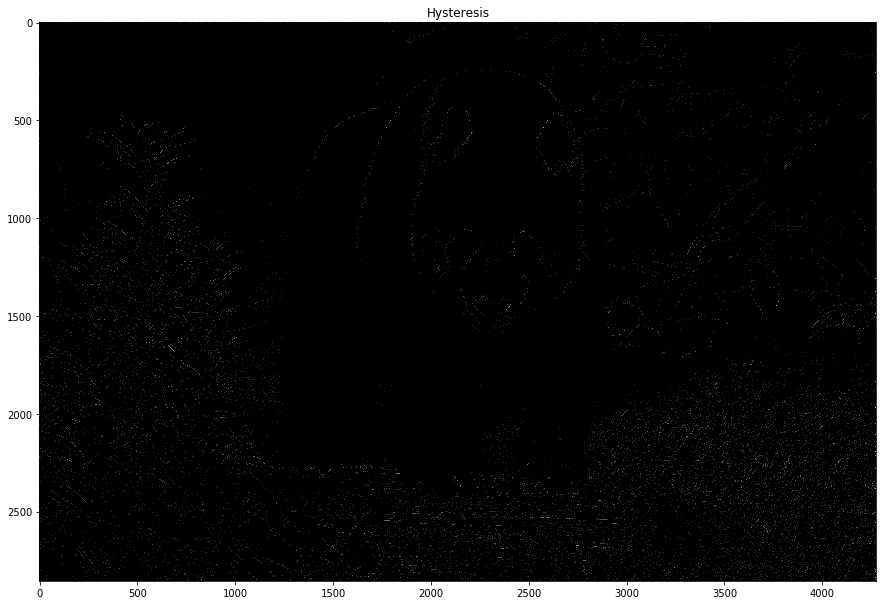

In [254]:
# Step 5: Hysteresis
hysteresis = np.copy(dt)
count = 0
weak_copy = []
for x in weak:
    weak_copy.append(x)

while weak_copy and count < 10*len(weak):
    (row, col) = weak_copy.pop()
    connected = False
    weakly_connected = False
    for i in range(-1,2):
        for j in range(-1,2):
            if dt[row+i][col+j] == 1:
                connected = True
            if dt[row+i][col+j] != 0:
                weakly_connected = True
    if connected:
        hysteresis[row][col] = 1
    elif weakly_connected:
        weak_copy.append((row,col))
    else:
        hysteresis[row][col] = 0
    count += 1

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax = plt.subplot(111)
ax.set_title('Hysteresis')
ax.imshow(hysteresis, cmap='gray')

# Exercise 3: Feature Detector
In this exercise we will be implementing a feature detector to find the letter 'h' in an image of text. This will be done by scanning over the input image and comparing each patch to a template.

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1]
 [1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1]
 [1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1]
 [1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


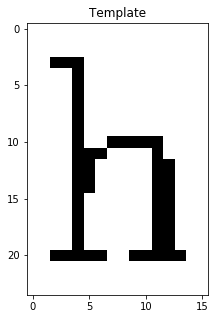

In [371]:
from scipy.io import loadmat
template = loadmat('images/template-h.mat')['T']
print(template)

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)
ax = plt.subplot(111)
ax.set_title('Template')
ax.imshow(template, cmap='gray')

0.0


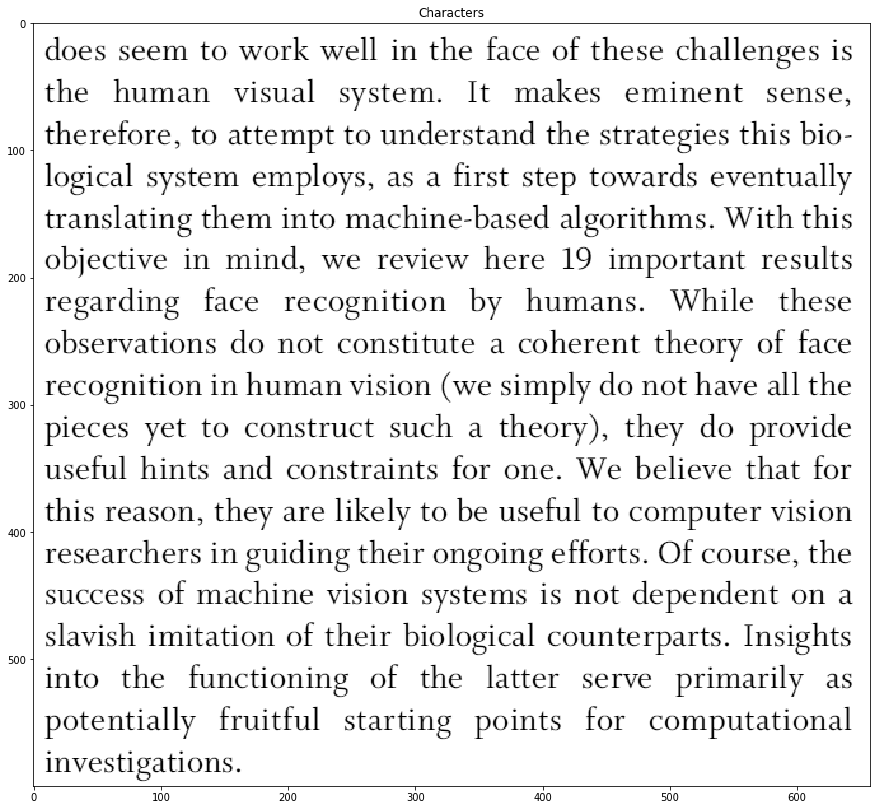

In [370]:
characters = io.imread('images/characters.png', as_grey=True)
print(np.min(characters))

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax2 = plt.subplot(111)
ax2.set_title('Characters')
ax2.imshow(characters, cmap='gray')

In [375]:
def identify(img, t):
    ih, iw = img.shape
    th, tw = t.shape
    rh = ih - th + 1
    rw = iw - tw + 1
    D = np.zeros((rh,rw))
    for r in range(rh):
        for c in range(rw):
            patch = np.zeros(t.shape)
            temp = img[r:r+th]
            for a in range(temp.shape[0]):
                patch[a] = temp[a][c:c+tw]
            D[r][c] = np.sum(np.square((patch - t)))
    return D

123.55009047569519
7.92891642488043
70.96155606001965


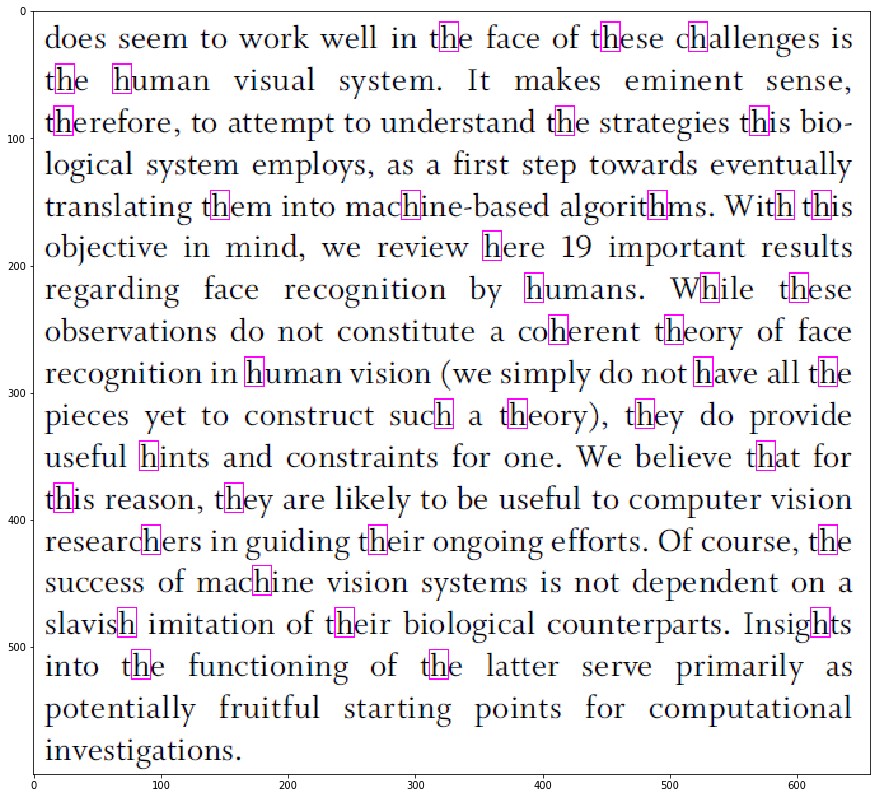

In [378]:
threshold = 10
RI=io.imread('images/characters.png')
D = identify(characters, template)
print(np.max(D))
print(np.min(D))
print(np.mean(D))
for r in range(rh):
    for c in range(rw):
        if D[r][c] < threshold:
            for x in range(r, r+th):
                RI[x][c][0] = 255
                RI[x][c][1] = 0
                RI[x][c][2] = 255
            
                RI[x][c+tw-1][0] = 255
                RI[x][c+tw-1][1] = 0
                RI[x][c+tw-1][2] = 255
            
            for x in range(c, c+tw):
                RI[r][x][0] = 255
                RI[r][x][1] = 0
                RI[r][x][2] = 255

                RI[r+th-1][x][0] = 255
                RI[r+th-1][x][1] = 0
                RI[r+th-1][x][2] = 255
                           
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax1 = plt.subplot(111)
ax1.imshow(RI)

# Exercise 4: ROC Curves
Roc curves are frequently used in machine learning problems to demonstrate the effectiveness of a classifier. An ROC curve plots the True Positive Rate vs the False Positive Rate.

The True Positive Rate is defined as:
$$TruePositiveRate=\frac{TruePostives}{AllPositives}$$

and the False Positive Rate is defined as:
$$FalsePositiveRate=\frac{FalsePositives}{AllNegatives}$$
To draw the curve, we sample points from the curve at various threshold values.

In this exercise we will also attempt to see what the effect of adding noise to the image does to the ROC curves. We will use the results of exercise 3 as the baseline and compare it to the feature detector applied to a noisy image.

In [352]:
def roc(baseline, test):
    rows,cols = baseline.shape
    fp = 0
    fn = 0
    tp = 0
    tn = 0
    for r in range(rows):
        for c in range(cols):
            real = baseline[r][c]
            pred = test[r][c]
            if real == pred:
                if pred > 0:
                    tp += 1
                else:
                    tn += 1
            else:
                if pred > 0:
                    fp += 1
                else:
                    fn += 1
    if fp + tn == 0:
        fpr = 0
    else:
        fpr = fp/(fp + tn) 
    if tp+fn == 0:
        tpr = 0
    else:
        tpr = tp/(tp + fn)
    return (fpr, tpr)

In [355]:
def classify(img, template, threshold):
    D = identify(img, template)
    output = np.zeros(D.shape)
    for r in range(rh):
        for c in range(rw):
            if D[r][c] < threshold:
                output[r][c] = 1
    return output

In [381]:
baseline = classify(characters, template, 10)

(0.7631578947368421, 1.0)
(0.0, 0.9997546991290471)
(0.0, 0.9995471368536255)
(0.0, 0.9966816992072199)
(0.0, 0.9782221347645247)
(0.0, 0.7700290856746987)
(0.0, 0.4034983678057433)
(0.0, 0.17178339124410671)
(0.0, 0.04825957684251954)
(0.0, 0.006323910365444385)
(1.0, 1.0)
(1.0, 1.0)


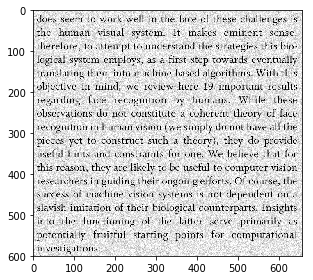

In [382]:
# Add noise
from skimage.util import random_noise
noisy_1 = random_noise(characters, mean=0)
for i in range(1,11):
    D1 = classify(noisy_1,template,i*10)
    print(roc(baseline,D1))
noisy_2 = random_noise(characters, mean=-.1)
D2 = classify(noisy_2,template,10)
print(roc(baseline,D2))
noisy_3 = random_noise(characters, var=.1)
D3 = classify(noisy_3,template,10)
print(roc(baseline,D3))
io.imshow(noisy_2)

# References
- EECS 531 Lectures Slides
- [Wikipedia Sobel Operator](https://en.wikipedia.org/wiki/Sobel_operator#Formulation)
- [Wikipedia Canny Edge Detector](https://en.wikipedia.org/wiki/Canny_edge_detector#Process_of_Canny_edge_detection_algorithm)